Jupyter Notebook을 실행하기 전에 환경변수 설정.

```bash
set JAVA_HOME=C:\Java\jdk1.8.0_231
```

형태소 분석기 비교

<http://konlpy.org/ko/latest/morph/>

In [1]:
import pandas as pd

pd.__version__

'0.24.2'

In [2]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.0'

In [3]:
# matplotlib에 “AppleGothc”(Mac) 또는 “Malgun Gothic”(Windows) 글꼴 적용

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['Malgun Gothic']

In [4]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.1'

In [5]:
from konlpy.tag import Okt

okt = Okt()

In [6]:
okt.pos('아버지가 방에 들어가신다')

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]

In [25]:
song_df = pd.read_csv('song_data_20102018_last.csv')
feat = pd.read_csv('file/feat_artist_191202.csv') 

In [26]:
feat.head()

,song_id,feat_artist
0,2517998,강민경 From Davichi
1,2388945,미스터타이푼
2,2529931,용준형 From Beast
3,2507672,정엽
4,2388877,슈프림팀


In [27]:
song_df.head()

,song_id,title,artist,album,genre,like,reply
0,2511561,우리 사랑하게 됐어요.,"['가인', ' 조권']",우리 사랑하게 됐어요,댄스,22821.0,57.0
1,2366796,너 때문에,['애프터스쿨'],너 때문에,댄스,16297.0,32.0
2,2371262,Bo Peep Bo Peep,['티아라'],Absolute First Album,댄스,8887.0,41.0
3,2425271,오늘 헤어졌어요,['윤하 (YOUNHA)'],3rd Album Part.B `Growing Season`,발라드,59736.0,54.0
4,2517998,처음처럼 그때처럼 (Feat. 강민경 From Davichi),['이승기'],처음처럼 그때처럼,발라드,8217.0,8.0


In [28]:
from collections import Counter

counter = Counter()

for feat_artist in feat.feat_artist.values:
    counter += Counter(okt.pos(feat_artist))

counter

Counter({('강민경', 'Noun'): 23,
         ('From', 'Alpha'): 116,
         ('Davichi', 'Alpha'): 12,
         ('미스터', 'Noun'): 10,
         ('타이푼', 'Noun'): 10,
         ('용준형', 'Noun'): 222,
         ('Beast', 'Alpha'): 57,
         ('정엽', 'Noun'): 25,
         ('슈프림팀', 'Noun'): 67,
         ('주희', 'Noun'): 19,
         ('Of', 'Alpha'): 1529,
         ('에이트', 'Noun'): 8,
         ('드로플렛', 'Noun'): 3,
         (',', 'Punctuation'): 1303,
         ('슬', 'Noun'): 3,
         ('라임', 'Noun'): 6,
         ('정인', 'Noun'): 51,
         ('김진호', 'Noun'): 9,
         ('SG', 'Alpha'): 9,
         ('워', 'Noun'): 9,
         ('너비', 'Noun'): 9,
         ('이수근', 'Noun'): 14,
         ('Beyonce', 'Alpha'): 19,
         ('아웃사이더', 'Noun'): 18,
         ('장기하', 'Noun'): 3,
         ('와', 'Josa'): 3,
         ('얼굴', 'Noun'): 3,
         ('들', 'Suffix'): 6,
         ('마리오', 'Noun'): 9,
         ('에이맨', 'Noun'): 1,
         ('수호', 'Noun'): 2,
         (')', 'Punctuation'): 560,
         ('(', 'Punctuation'): 7

In [29]:
song_df.head()

,song_id,title,artist,album,genre,like,reply
0,2511561,우리 사랑하게 됐어요.,"['가인', ' 조권']",우리 사랑하게 됐어요,댄스,22821.0,57.0
1,2366796,너 때문에,['애프터스쿨'],너 때문에,댄스,16297.0,32.0
2,2371262,Bo Peep Bo Peep,['티아라'],Absolute First Album,댄스,8887.0,41.0
3,2425271,오늘 헤어졌어요,['윤하 (YOUNHA)'],3rd Album Part.B `Growing Season`,발라드,59736.0,54.0
4,2517998,처음처럼 그때처럼 (Feat. 강민경 From Davichi),['이승기'],처음처럼 그때처럼,발라드,8217.0,8.0


In [30]:
feat.head()

,song_id,feat_artist
0,2517998,강민경 From Davichi
1,2388945,미스터타이푼
2,2529931,용준형 From Beast
3,2507672,정엽
4,2388877,슈프림팀


In [31]:
from collections import Counter

rows = []

for feat_artist in feat.feat_artist.values:
    for word, tag in okt.pos(feat_artist):
        rows.append([word, tag, f'{word}/{tag}'])

words_df = pd.DataFrame(rows, columns=['word', 'tag', 'word_and_tag'])

words_df

,word,tag,word_and_tag
0,강민경,Noun,강민경/Noun
1,From,Alpha,From/Alpha
2,Davichi,Alpha,Davichi/Alpha
3,미스터,Noun,미스터/Noun
4,타이푼,Noun,타이푼/Noun
5,용준형,Noun,용준형/Noun
6,From,Alpha,From/Alpha
7,Beast,Alpha,Beast/Alpha
8,정엽,Noun,정엽/Noun
9,슈프림팀,Noun,슈프림팀/Noun


In [32]:
pd.DataFrame(words_df.word_and_tag.value_counts())

,word_and_tag
Of/Alpha,1529
",/Punctuation",1303
./Punctuation,851
(/Punctuation,731
)/Punctuation,560
&/Punctuation,286
Prod/Alpha,283
T/Alpha,267
Zion/Alpha,254
of/Alpha,250


In [33]:
words_counts = words_df[words_df.tag != 'Punctuation'][words_df.tag != 'Josa'].word_and_tag.value_counts()

pd.DataFrame(words_counts)

,word_and_tag
Of/Alpha,1529
Prod/Alpha,283
T/Alpha,267
Zion/Alpha,254
of/Alpha,250
개코/Noun,239
용준형/Noun,222
The/Alpha,172
버벌진트/Noun,168
Crush/Alpha,162


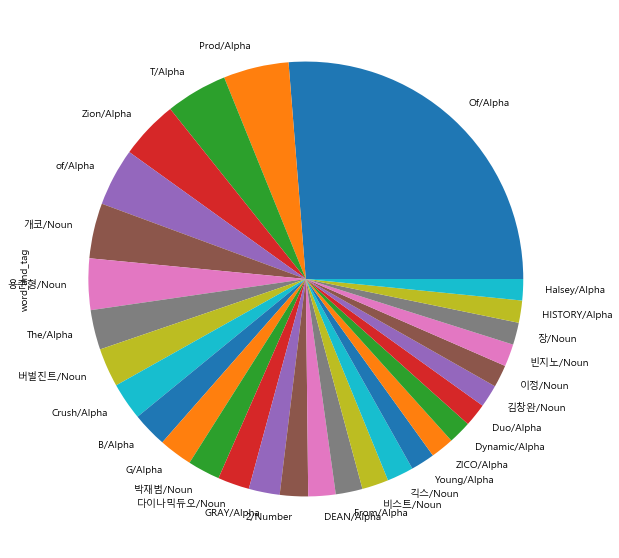

In [34]:
words_counts.nlargest(30).plot.pie(figsize=[10, 10])

plt.show()